In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import sys
import numpy as np
import cugraph as cg
import cudf, cuml
import pandas as pd
import cupy as cp

In [2]:
# maxInt = sys.maxsize
# while True:
#     # decrease the maxInt value by factor 10
#     # as long as the OverflowError occurs.
#     try:
#         csv.field_size_limit(maxInt)
#         break
#     except OverflowError:
#         maxInt = int(maxInt/10)

In [3]:
# Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,Price_USD,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category

#Read Data from csv
# filename = "./data/Data_API.csv"
# with open(filename,'r', encoding='UTF-8') as f:
#      reader = csv.reader(f)
#      header = next(reader)
#      seller_address_list = []
#      buyer_address_list = []
#      category_list=[]
#      for row in reader:
#          seller_address_list.append(row[3])
#          buyer_address_list.append(row[5])
#          category_list.append(row[23])
# edge_list = list(zip(seller_address_list, buyer_address_list))

In [4]:
labels=['Art','Collectible','Games','Metaverse','Utility','Other']

In [5]:
paths={
    # "Data API":"./data/Data_API_mapped.csv",
    "Art":"./data/Art_mapped.csv",
    "Collectible":"./data/Collectible_mapped.csv",
    "Games":"./data/Games_mapped.csv",
    "Metaverse":"./data/Metaverse_mapped.csv",
    "Utility":"./data/Utility_mapped.csv",
    "Other":"./data/Other_mapped.csv"
    }

In [6]:
df_list=[]
for key in paths:
    df=cudf.read_csv(paths[key])
    df=df.iloc[:,0:2]
    df.columns = ["Seller","Buyer"]
    print(df.head())
    df_list.append(df)

   Seller  Buyer
0       2      3
1       2      4
2       5      6
3       7      8
4       5      9
   Seller  Buyer
0       0      1
1       0      1
2       2      3
3       4      5
4       3      6
   Seller  Buyer
0       0      2
1       0      1
2       0      2
3       0      2
4       0      2
   Seller  Buyer
0       2      1
1       3      1
2       4      1
3       5      1
4       6      1
   Seller  Buyer
0       2      3
1       4      5
2       4      0
3       4      0
4       4      6
   Seller  Buyer
0       2      3
1       2      1
2       4      5
3       6      7
4       6      8


In [8]:
num_nodes_list=[]
num_edges_list=[]
graphs=[]
for i,label in enumerate(labels):
    G = cg.MultiGraph()
    df=df_list[i]
    G.from_cudf_edgelist(df, source="Seller", destination="Buyer")
    graphs.append(G)
    #Ouput the number of nodes and edges
    print("----{}----".format(label))
    nodes = G.number_of_nodes()
    num_nodes_list.append(nodes)
    edges = G.number_of_edges()
    num_edges_list.append(edges)
    print("Number of nodes and edges: ",nodes,"  ",edges)

----Art----
Number of nodes and edges:  161260    1377796
----Collectible----
Number of nodes and edges:  92243    1589742
----Games----
Number of nodes and edges:  282915    2271523
----Metaverse----
Number of nodes and edges:  18330    62524
----Utility----
Number of nodes and edges:  3459    7798
----Other----
Number of nodes and edges:  48300    272704


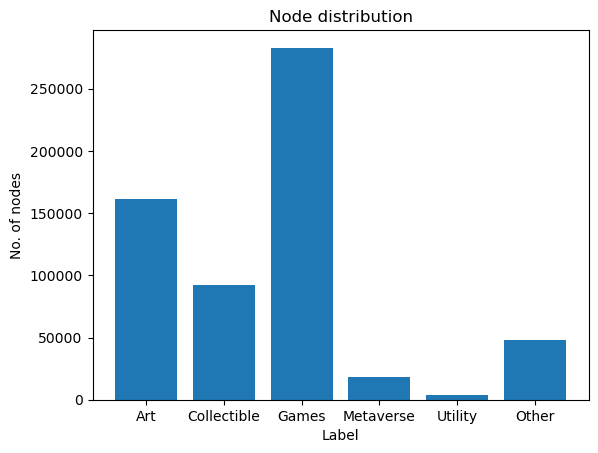

In [6]:
plt.bar(labels, num_nodes_list)
plt.title('Node distribution')
plt.xlabel('Label')
plt.ylabel('No. of nodes')
plt.show()

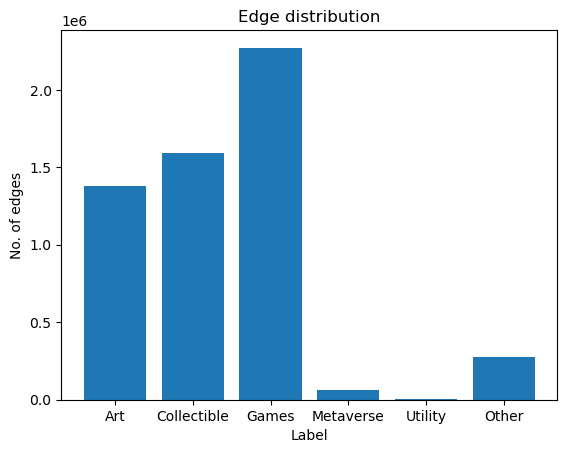

In [7]:
plt.bar(labels, num_edges_list)
plt.title('Edge distribution')
plt.xlabel('Label')
plt.ylabel('No. of edges')
plt.show()

In [13]:
avg_in_degree_list=[]
avg_out_degree_list=[]
avg_degree_list=[]
list_of_degree_list=[]

for i,graph in enumerate(graphs):
    sum_of_in_degree=0
    sum_of_out_degree=0
    degree_list=[]
    for j,node in enumerate(graph.nodes().to_numpy()):
        temp_in=graph.in_degree(node).to_numpy()[0][1]
        temp_out=graph.out_degree(node).to_numpy()[0][1]
        sum_of_in_degree+=temp_in
        sum_of_out_degree+=temp_out

        degree_list.append(temp_in+temp_out)
        if j%1000==0:
            print('----{} nodes----'.format(j))

    divisor=num_nodes_list[i]
    avg_out_degree=sum_of_out_degree/divisor
    avg_in_degree=sum_of_in_degree/divisor
    avg_degree=(sum_of_in_degree+sum_of_out_degree)/divisor

    print("Category: {}".format(labels[i]))
    print("Average in-degree: ",avg_in_degree)
    avg_in_degree_list.append(avg_in_degree)

    print("Average out-degree: ",avg_out_degree)
    avg_out_degree_list.append(avg_out_degree)

    print("Average degree: ",avg_degree)
    avg_degree_list.append(avg_degree)
    degree_list=cp.array(degree_list)
    list_of_degree_list.append(degree_list)


----0 nodes----
----1000 nodes----
----2000 nodes----
----3000 nodes----
----4000 nodes----
----5000 nodes----
----6000 nodes----
----7000 nodes----
----8000 nodes----
----9000 nodes----
----10000 nodes----
----11000 nodes----
----12000 nodes----
----13000 nodes----
----14000 nodes----
----15000 nodes----
----16000 nodes----
----17000 nodes----
----18000 nodes----
----19000 nodes----
----20000 nodes----
----21000 nodes----
----22000 nodes----
----23000 nodes----
----24000 nodes----
----25000 nodes----
----26000 nodes----
----27000 nodes----
----28000 nodes----
----29000 nodes----
----30000 nodes----
----31000 nodes----
----32000 nodes----
----33000 nodes----
----34000 nodes----
----35000 nodes----
----36000 nodes----
----37000 nodes----
----38000 nodes----
----39000 nodes----
----40000 nodes----
----41000 nodes----
----42000 nodes----
----43000 nodes----
----44000 nodes----
----45000 nodes----
----46000 nodes----
----47000 nodes----
----48000 nodes----
----49000 nodes----
----50000 nod

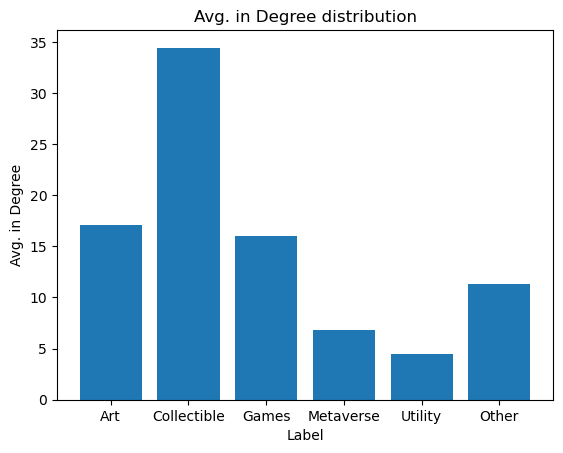

In [14]:
plt.bar(labels, avg_in_degree_list)
plt.title('Avg. in Degree distribution')
plt.xlabel('Label')
plt.ylabel('Avg. in Degree')
plt.show()

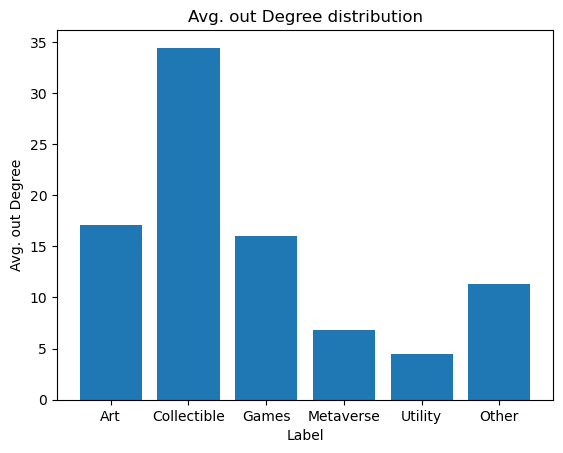

In [15]:
plt.bar(labels, avg_out_degree_list)
plt.title('Avg. out Degree distribution')
plt.xlabel('Label')
plt.ylabel('Avg. out Degree')
plt.show()

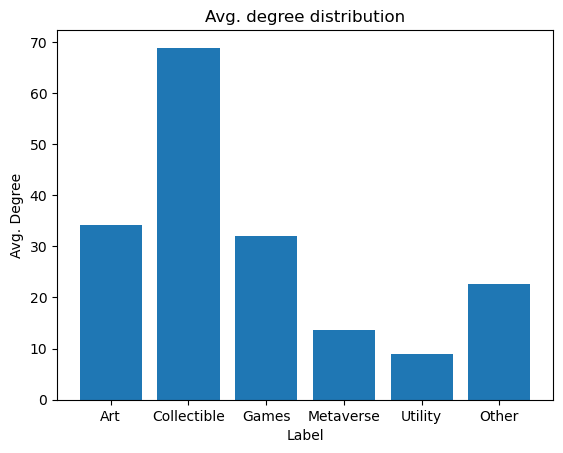

In [16]:
plt.bar(labels, avg_degree_list)
plt.title('Avg. degree distribution')
plt.xlabel('Label')
plt.ylabel('Avg. Degree')
plt.show()

Text(0, 0.5, 'Count,P(K)*n')

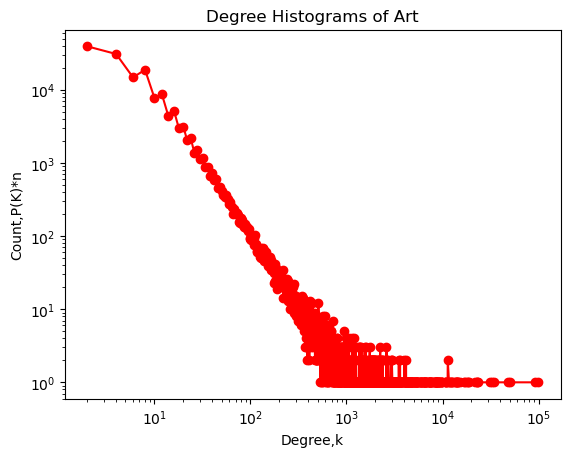

In [31]:
from collections import Counter
degree_list=list_of_degree_list[0]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[0]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

Text(0, 0.5, 'Count,P(K)*n')

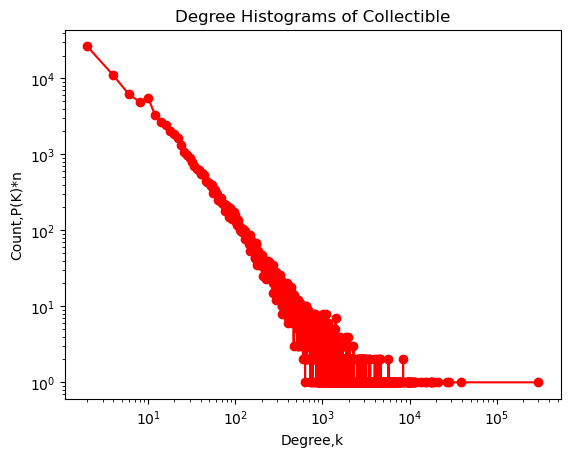

In [32]:
degree_list=list_of_degree_list[1]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[1]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

Text(0, 0.5, 'Count,P(K)*n')

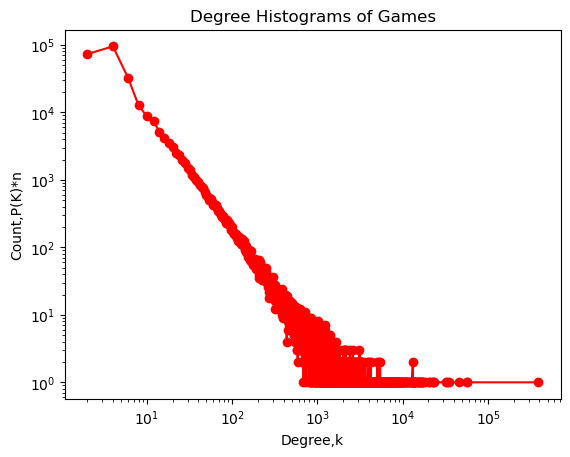

In [33]:
degree_list=list_of_degree_list[2]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[2]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

Text(0, 0.5, 'Count,P(K)*n')

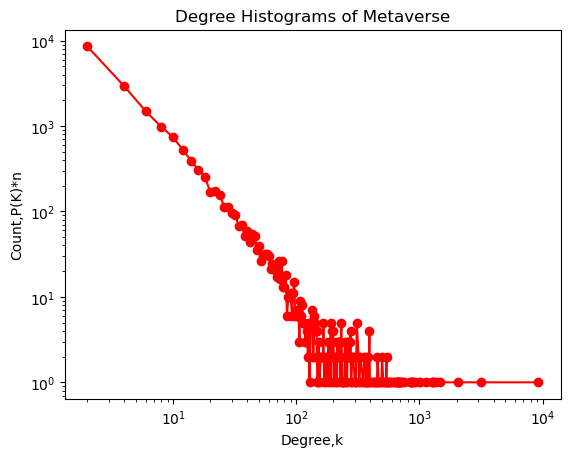

In [34]:
degree_list=list_of_degree_list[3]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[3]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

Text(0, 0.5, 'Count,P(K)*n')

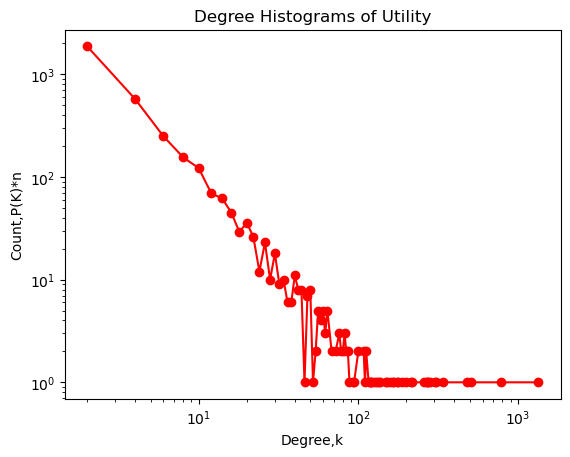

In [35]:
degree_list=list_of_degree_list[4]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[4]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

Text(0, 0.5, 'Count,P(K)*n')

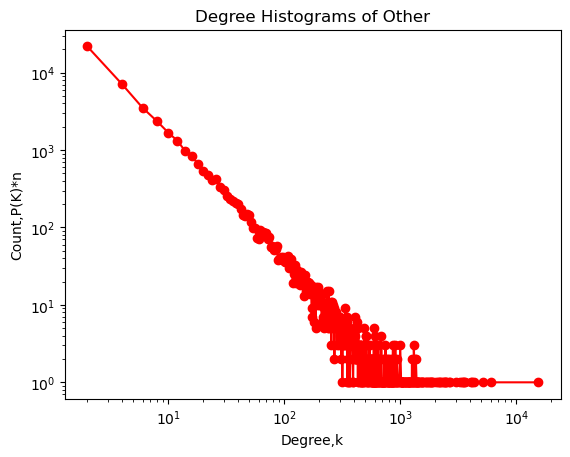

In [36]:
degree_list=list_of_degree_list[5]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[5]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

-----0 node----
-----1000 node----
-----2000 node----
-----3000 node----
-----4000 node----
-----5000 node----
-----6000 node----
-----7000 node----
-----8000 node----
-----9000 node----
-----10000 node----
-----11000 node----
-----12000 node----
-----13000 node----
-----14000 node----
-----15000 node----
-----16000 node----
-----17000 node----
-----18000 node----
-----19000 node----
-----20000 node----
-----21000 node----
-----22000 node----
-----23000 node----
-----24000 node----
-----25000 node----
-----26000 node----
-----27000 node----
-----28000 node----
-----29000 node----
-----30000 node----
-----31000 node----
-----32000 node----
-----33000 node----
-----34000 node----
-----35000 node----
-----36000 node----
-----37000 node----
-----38000 node----
-----39000 node----
-----40000 node----
-----41000 node----
-----42000 node----
-----43000 node----
-----44000 node----
-----45000 node----
-----46000 node----
-----47000 node----
-----48000 node----
-----49000 node----
-----50000 no

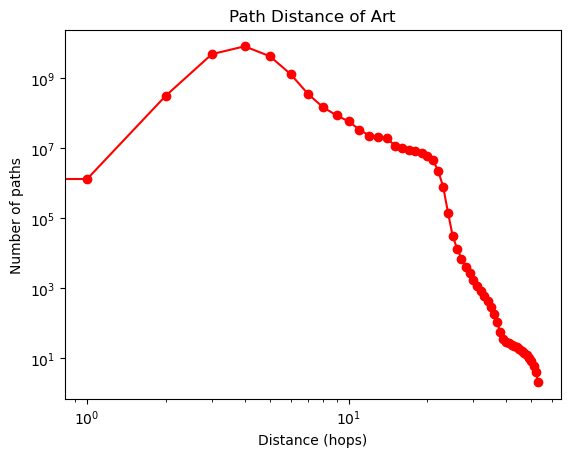

In [14]:
# compute distance
from collections import Counter
k=0
graph = graphs[k]
total_dis=0
len_dis=0
counter=Counter([])
for i, node in enumerate(graph.nodes().to_numpy()):
    path_len = cg.sssp(graph, source=node)
    dis_seq=path_len['distance'].to_numpy()
    dis_seq=dis_seq[dis_seq<10**10]
    counter.update(dis_seq)
    total_dis+=sum(dis_seq)
    len_dis+=len(dis_seq)

    if i % 1000 == 0:
        print("-----{} node----".format(i))

dis_freq = [counter.get(d,0) for d in range(int(max(counter))+1)]
dis = range(len(dis_freq))

#log-log
plt.title("Path Distance of {}".format(labels[k]))
plt.loglog(dis, dis_freq, 'ro-')
plt.xlabel('Distance (hops)')
plt.ylabel('Number of paths')
#Calculate average path
avg_path = total_dis / (len_dis- num_nodes_list[k])
print(avg_path)

In [ ]:
# compute distance
from collections import Counter
k=1
graph = graphs[k]
total_dis=0
len_dis=0
counter=Counter([])
for i, node in enumerate(graph.nodes().to_numpy()):
    path_len = cg.sssp(graph, source=node)
    dis_seq=path_len['distance'].to_numpy()
    dis_seq=dis_seq[dis_seq<10**10]
    counter.update(dis_seq)
    total_dis+=sum(dis_seq)
    len_dis+=len(dis_seq)

    if i % 1000 == 0:
        print("-----{} node----".format(i))

dis_freq = [counter.get(d,0) for d in range(int(max(counter))+1)]
dis = range(len(dis_freq))

#log-log
plt.title("Path Distance of {}".format(labels[k]))
plt.loglog(dis, dis_freq, 'ro-')
plt.xlabel('Distance (hops)')
plt.ylabel('Number of paths')
#Calculate average path
avg_path = total_dis / (len_dis- num_nodes_list[k])
print(avg_path)

-----0 node----
-----1000 node----
-----2000 node----
-----3000 node----
-----4000 node----
-----5000 node----
-----6000 node----
-----7000 node----
-----8000 node----
-----9000 node----
-----10000 node----
-----11000 node----
-----12000 node----
-----13000 node----
-----14000 node----
-----15000 node----
-----16000 node----
-----17000 node----
-----18000 node----
-----19000 node----
-----20000 node----
-----21000 node----
-----22000 node----
-----23000 node----
-----24000 node----
-----25000 node----
-----26000 node----
-----27000 node----
-----28000 node----
-----29000 node----
-----30000 node----
-----31000 node----
-----32000 node----
-----33000 node----
-----34000 node----
-----35000 node----
-----36000 node----
-----37000 node----
-----38000 node----
-----39000 node----
-----40000 node----
-----41000 node----
-----42000 node----
-----43000 node----
-----44000 node----
-----45000 node----
-----46000 node----
-----47000 node----
-----48000 node----
-----49000 node----
-----50000 no

In [ ]:
# compute distance
from collections import Counter
k=2
graph = graphs[k]
total_dis=0
len_dis=0
counter=Counter([])
for i, node in enumerate(graph.nodes().to_numpy()):
    path_len = cg.sssp(graph, source=node)
    dis_seq=path_len['distance'].to_numpy()
    dis_seq=dis_seq[dis_seq<10**10]
    counter.update(dis_seq)
    total_dis+=sum(dis_seq)
    len_dis+=len(dis_seq)

    if i % 1000 == 0:
        print("-----{} node----".format(i))

dis_freq = [counter.get(d,0) for d in range(int(max(counter))+1)]
dis = range(len(dis_freq))

#log-log
plt.title("Path Distance of {}".format(labels[k]))
plt.loglog(dis, dis_freq, 'ro-')
plt.xlabel('Distance (hops)')
plt.ylabel('Number of paths')
#Calculate average path
avg_path = total_dis / (len_dis- num_nodes_list[k])
print(avg_path)

In [ ]:
# compute distance
from collections import Counter
k=3
graph = graphs[k]
total_dis=0
len_dis=0
counter=Counter([])
for i, node in enumerate(graph.nodes().to_numpy()):
    path_len = cg.sssp(graph, source=node)
    dis_seq=path_len['distance'].to_numpy()
    dis_seq=dis_seq[dis_seq<10**10]
    counter.update(dis_seq)
    total_dis+=sum(dis_seq)
    len_dis+=len(dis_seq)

    if i % 1000 == 0:
        print("-----{} node----".format(i))

dis_freq = [counter.get(d,0) for d in range(int(max(counter))+1)]
dis = range(len(dis_freq))

#log-log
plt.title("Path Distance of {}".format(labels[k]))
plt.loglog(dis, dis_freq, 'ro-')
plt.xlabel('Distance (hops)')
plt.ylabel('Number of paths')
#Calculate average path
avg_path = total_dis / (len_dis- num_nodes_list[k])
print(avg_path)

-----0 node----
-----1000 node----
-----2000 node----
-----3000 node----
6.22138679038831


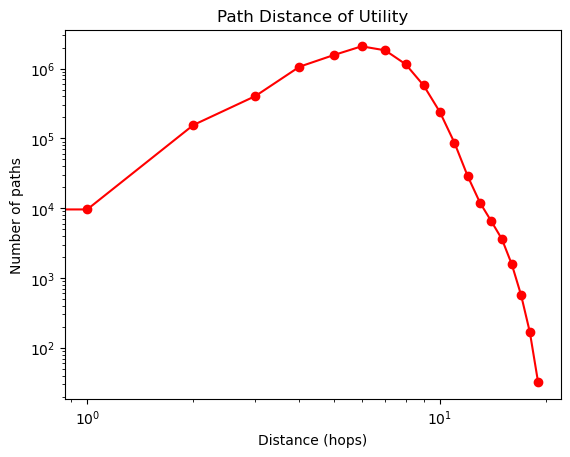

In [13]:
# compute distance
from collections import Counter
k=4
graph = graphs[k]
total_dis=0
len_dis=0
counter=Counter([])
for i, node in enumerate(graph.nodes().to_numpy()):
    path_len = cg.sssp(graph, source=node)
    dis_seq=path_len['distance'].to_numpy()
    dis_seq=dis_seq[dis_seq<10**10]
    counter.update(dis_seq)
    total_dis+=sum(dis_seq)
    len_dis+=len(dis_seq)

    if i % 1000 == 0:
        print("-----{} node----".format(i))

dis_freq = [counter.get(d,0) for d in range(int(max(counter))+1)]
dis = range(len(dis_freq))

#log-log
plt.title("Path Distance of {}".format(labels[k]))
plt.loglog(dis, dis_freq, 'ro-')
plt.xlabel('Distance (hops)')
plt.ylabel('Number of paths')
#Calculate average path
avg_path = total_dis / (len_dis- num_nodes_list[k])
print(avg_path)

In [ ]:
# compute distance
from collections import Counter
k=5
graph = graphs[k]
total_dis=0
len_dis=0
counter=Counter([])
for i, node in enumerate(graph.nodes().to_numpy()):
    path_len = cg.sssp(graph, source=node)
    dis_seq=path_len['distance'].to_numpy()
    dis_seq=dis_seq[dis_seq<10**10]
    counter.update(dis_seq)
    total_dis+=sum(dis_seq)
    len_dis+=len(dis_seq)

    if i % 1000 == 0:
        print("-----{} node----".format(i))

dis_freq = [counter.get(d,0) for d in range(int(max(counter))+1)]
dis = range(len(dis_freq))

#log-log
plt.title("Path Distance of {}".format(labels[k]))
plt.loglog(dis, dis_freq, 'ro-')
plt.xlabel('Distance (hops)')
plt.ylabel('Number of paths')
#Calculate average path
avg_path = total_dis / (len_dis- num_nodes_list[k])
print(avg_path)

In [ ]:
for i,graph in enumerate(graphs):
    out_degree_centrality = cg.out_degree_centrality(graph)
    in_degree_centrality = cg.in_degree_centrality(graph)

    print("Out-degree centrality for {}: {}".format(labels[i],out_degree_centrality))
    print("In-degree centrality for {}: {}".format(labels[i],in_degree_centrality))

In [ ]:
for i,graph in enumerate(graphs):
    betweenness_centrality = cg.multibetweenness_centrality(graph)
    print("Betweenness centrality for {}: {}".format(labels[i],betweenness_centrality))

In [ ]:
for i,graph in enumerate(graphs):
    constraint_centrality = cg.multiconstraint_centrality(graph)
    print("Constraint centrality for {}: {}".format(labels[i],constraint_centrality))

In [ ]:
for i,graph in enumerate(graphs):
    close_centrality = cg.multiclose_centrality(graph)
    print("closeness centrality for {}: {}".format(labels[i],close_centrality))

In [ ]:
k=4
weighted_graph = cg.DiGraph()
for src, dst in zip(edges['src'], edges['dst']):
    if weighted_graph.has_edge(src, dst):
        weighted_graph.set_edge_value(src, dst, weighted_graph.get_edge_value(src, dst) )
    else:
        weighted_graph.add_edge(src, dst)

clustering = weighted_graph.clustering_coefficient()

In [ ]:
#log-log
plt.title("Average clustering coefficient versus degree(log)")
plt.loglog(degree_unique,coef_degree_list,'ro-')
plt.xlabel('k (degree)')
plt.ylabel('Ck (Clustering coefficient)')

In [ ]:
G_undirected=G.to_undirected()
component_list = list(nx.connected_components(G_undirected))
component_size_list = [len(_component) for _component in component_list]

component_count = Counter(component_size_list)
component_freq = [component_count.get(i,0) for i in range(max(component_count)+1)]
component_size = range(len(component_freq))
#log-log
print(component_count.get(0,0))
plt.title("Connected components versus size(log)")
plt.loglog(component_size ,component_freq,'ro-')
plt.xlabel('connected component size')
plt.ylabel('number of connected components')

In [ ]:
nx_eigen_centrality = nx.eigenvector_centrality(G_weighted,max_iter=10000).values()
print('eigenvector centrality:', nx_eigen_centrality)